In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
my_data = np.genfromtxt('italy2020.csv', delimiter=',',skip_header=4)

In [4]:
time = my_data[:,4]

In [5]:
time

array([43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10.])

In [6]:
cases = my_data[:,19]

In [8]:
cases

array([ nan,  nan,  nan,   3.,   4.,  18.,  27.,  45.,  75.,  68.,  85.,
       178., 454., 419., 544., 513., 505., 319.,  nan,  nan])

In [10]:
cases[3:18]

array([  3.,   4.,  18.,  27.,  45.,  75.,  68.,  85., 178., 454., 419.,
       544., 513., 505., 319.])

In [11]:
def fitExp(t, a, b, c):
    return a*np.exp(b*t) + c

def fitPowerlaw(t, a, b, c):
    return a*t**(b) + c


In [12]:
ydata = np.cumsum(cases[3:18])
t = np.arange(1,len(ydata)+1,1)
xdata = t
xdata,ydata

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([3.000e+00, 7.000e+00, 2.500e+01, 5.200e+01, 9.700e+01, 1.720e+02,
        2.400e+02, 3.250e+02, 5.030e+02, 9.570e+02, 1.376e+03, 1.920e+03,
        2.433e+03, 2.938e+03, 3.257e+03]))

In [13]:
# Initial guess.
A0,B0,C0 = 1,1,1
x0 = np.array([A0, B0, C0])

func = fitExp
popt, pcov = curve_fit(func, xdata, ydata, x0,maxfev = 5000)
A, B, C = popt[0], popt[1], popt[2]
x = np.array([A, B, C])
curve = fitExp(t, A, B, C)
x,curve

(array([ 1.63942396e+02,  2.10762357e-01, -3.46394863e+02]),
 array([-143.98847852,  -96.5001108 ,  -37.87007345,   34.51568005,
         123.88450099,  234.22093834,  370.44439166,  538.62844472,
         746.27165898, 1002.63190029, 1319.13910502, 1709.90488886,
        2192.35171959, 2787.98970558, 3523.37563364]))

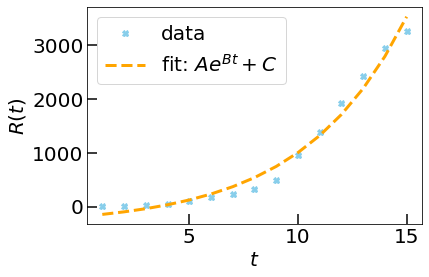

In [15]:
coltri = ["darkred", "skyblue", "orange"]



fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata, 'X', color=coltri[1],  label=r'data')
plt.plot(xdata, func(xdata, *popt), '--',color=coltri[2], lw=3, label=r'fit: $Ae^{Bt}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"$t$", fontsize=20)
plt.ylabel(r"$R(t)$", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.yscale('log')
# plt.xscale('log')
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")


In [16]:
# Initial guess.
A0,B0,C0 = 0.3,1,0.05
x0 = np.array([A0, B0, C0])

func = fitPowerlaw
popt, pcov = curve_fit(func, xdata, ydata, x0,maxfev = 5000)
A, B, C = popt[0], popt[1], popt[2]
x = np.array([A, B, C])
curve = fitExp(t, A, B, C)
x,curve

(array([  1.06187606,   2.99473947, -52.47142943]),
 array([-3.12549826e+01,  3.71436440e+02,  8.41727296e+03,  1.69174324e+05,
         3.38112491e+06,  6.75563913e+07,  1.34978808e+09,  2.69689743e+10,
         5.38844254e+11,  1.07661910e+13,  2.15110152e+14,  4.29793390e+15,
         8.58733800e+16,  1.71576333e+18,  3.42812151e+19]))

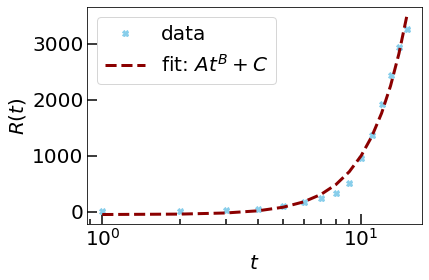

In [17]:
coltri = ["darkred", "skyblue", "orange"]



fig = plt.figure()
ax = fig.add_subplot(111)
#plt.plot(xdata,func(xdata,popt[0],popt[1],popt[2]), label=r'fit: $A+B\ln(t) + Ct$')
# plt.plot(xdata,func(xdata,A0,B0,C0), color=coltri[0], label=r'theory')
plt.plot(xdata,ydata, 'X', color=coltri[1],  label=r'data')
plt.plot(xdata, func(xdata, *popt), '--',color=coltri[0], lw=3, label=r'fit: $At^{B}+C$')
plt.legend(loc='best',prop={'size':20},frameon=True)
plt.xlabel(r"$t$", fontsize=20)
plt.ylabel(r"$R(t)$", fontsize=20)
ax.tick_params(which = 'major', axis='both', width=1.5, length = 10, labelsize=20,direction='in')
ax.tick_params(which = 'minor', axis='both', width=1.5, length = 5, labelsize=20,direction='in')
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
# plt.yscale('log')
plt.xscale('log')
plt.show()
# fig.savefig("fig_diamter_SISnoinset.pdf", bbox_inches='tight')
# plt.close("all")